<a href="https://colab.research.google.com/github/Ramotso/MNIST-Neural-Network/blob/main/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
assert tf.__version__ >= "0.20"

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils as np_utils


import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extenstion, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [47]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
X_train_full.shape

(60000, 28, 28)

In [49]:
X_train_full.dtype

dtype('uint8')

In [50]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

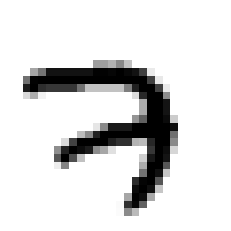

In [51]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [52]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [53]:
X_valid.shape

(5000, 28, 28)

In [54]:
X_test.shape

(10000, 28, 28)

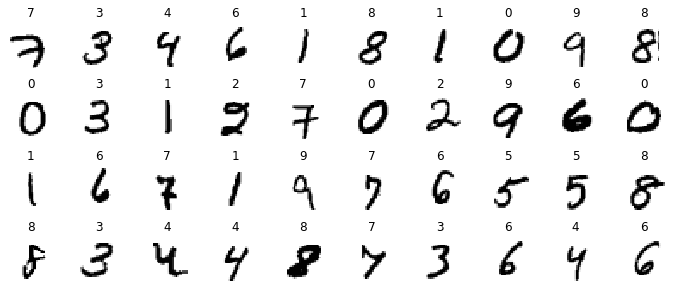

In [55]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [56]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.rates = []
    self.losses = []
  def on_batch_end(self, batch, logs):
    self.rates.append(K.get_value(self.model.optimizer.learning_rate))
    self.losses.append(logs["loss"])
    K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [57]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [59]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [60]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.5658 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

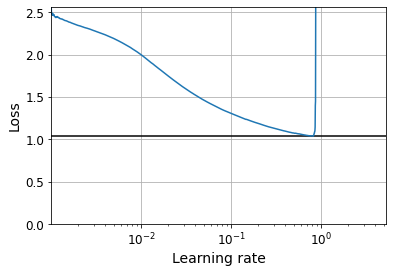

In [61]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [62]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [64]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [65]:
run_index = 1 #increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [66]:
early_stopping_cb =keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2362 - accuracy: 0.9266 - val_loss: 0.0978 - val_accuracy: 0.9704
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0946 - accuracy: 0.9703 - val_loss: 0.0926 - val_accuracy: 0.9730
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0664 - accuracy: 0.9787 - val_loss: 0.0827 - val_accuracy: 0.9756
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0750 - val_accuracy: 0.9790
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0354 - accuracy: 0.9880 - val_loss: 0.0788 - val_accuracy: 0.9784
Epoch 6/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0768 - val_accuracy: 0.9794
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0807 - val_ac

In [68]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9809


[0.08301407098770142, 0.98089998960495]